In [3]:
import sys
sys.path.append("/home/phylab/hepwork/ma5-histo")
sys.path.append("/home/phylab/hepwork/ma5_expert")

import src.SafReader as sr
from CutFlowReader import Collection 

import pandas as pd
import numpy as np
import matplotlib, os
import matplotlib.pyplot as plt
# Matplotlib configuration
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.style.use('classic')
plt.rcParams['xtick.direction']     = 'in'
plt.rcParams['ytick.direction']     = 'in'
plt.rcParams['xtick.top']           = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.right']         = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import matplotlib.cm as cm

from matplotlib import pyplot
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family' : "sans-serif"})
params= {'text.latex.preamble' : [r'\usepackage{amssymb}']}
pyplot.rcParams.update(params)

In [4]:
def df(fileLoc):
    data = sr.read(fileLoc=fileLoc)
    floatCols=['binMin', 'binMax', 'value']
    data[floatCols]  = data[floatCols].apply(pd.to_numeric, errors='coerce')
    data["bin"]      = (data.binMin+data.binMax)/2
    data             = data[data.binMax != np.inf]
    data             = data[data.binMin != -1*np.inf]
    data["binlabel"] = (data.binMin+data.binMax)/2
    return data

# Our framework in the limit of k_L = k_R = 0

14400     = lhaid     ! if pdlabel=lhapdf, this is the lhapdf number

5 = maxjetflavor    ! Maximum jet pdg code

3.0  = etal    ! max rap for the charged leptons

10.0   = mmll    ! min invariant mass of l+l- (same flavour) lepton pair

300.0  = mmllmax ! max invariant mass of l+l- (same flavour) lepton pair

# Absolute rapidity |y| > 0

In [13]:
ma5 = '/home/phylab/hepwork/madanalysis5'

sm  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMll_SameSeed/MadAnalysis5job_1/Cutflows',
                    saf_file       = '/home/phylab/hepwork/3.0.3-neworders/HEPTools/madanalysis5/madanalysis5/Benj_SM_leplep_SameSeed/Output/SAF/_defaultset/_defaultset.saf',
                    lumi           = 35.9)
sm_sumw   = sm['Rap_0'][0].sumw
sm_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMll_SameSeed/MadAnalysis5job_1/Histograms/histos.saf')


StockSM = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/StockSMll_SameSeed/MadAnalysis5job_1/Cutflows',
                    saf_file       = '/home/phylab/hepwork/3.0.3-neworders/HEPTools/madanalysis5/madanalysis5/StockSM_leplep_SameSeed/Output/SAF/_defaultset/_defaultset.saf',
                    lumi           = 35.9)
StockSM_sumw   = StockSM['Rap_0'][0].sumw
StockSM_histos = df(ma5+'/SSM_Zptoll/Output/SAF/StockSMll_SameSeed/MadAnalysis5job_1/Histograms/histos.saf')
#Done

SM_NLO = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMll_Mll10and300/MadAnalysis5job_6/Cutflows',
                    saf_file       = '/home/phylab/hepwork/3.0.3-neworders/HEPTools/madanalysis5/madanalysis5/SMll_NLO_Mll10and300/Output/SAF/_defaultset/_defaultset.saf',
                    lumi           = 35.9)
SM_NLO_sumw   = SM_NLO['Rap_0'][0].sumw
SM_NLO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMll_Mll10and300/MadAnalysis5job_6/Histograms/histos.saf')
#Done

StockSM_NLO = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/StockSM_NLO_Mll10and300/MadAnalysis5job_2/Cutflows',
                    saf_file       = '/home/phylab/hepwork/3.0.3-neworders/HEPTools/madanalysis5/madanalysis5/StockSM_NLO_Mll10and300/Output/SAF/_defaultset/_defaultset.saf',
                    lumi           = 35.9)
StockSM_NLO_sumw = StockSM_NLO['Rap_0'][0].sumw
StockSM_NLO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/StockSM_NLO_Mll10and300/MadAnalysis5job_2/Histograms/histos.saf')
#Done

In [15]:
from CutFlowTable import CutFlowTable
out =open('Comp_LOvsNLO_pTj25.tex','w')
CutFlowTable(sm,SM_NLO, sample_names=['SM @LO','SM @NLO']).write_comparison_table(out, mcunc=False)
!make > mk.log && rm Makefile

In [7]:
lumi=35.9

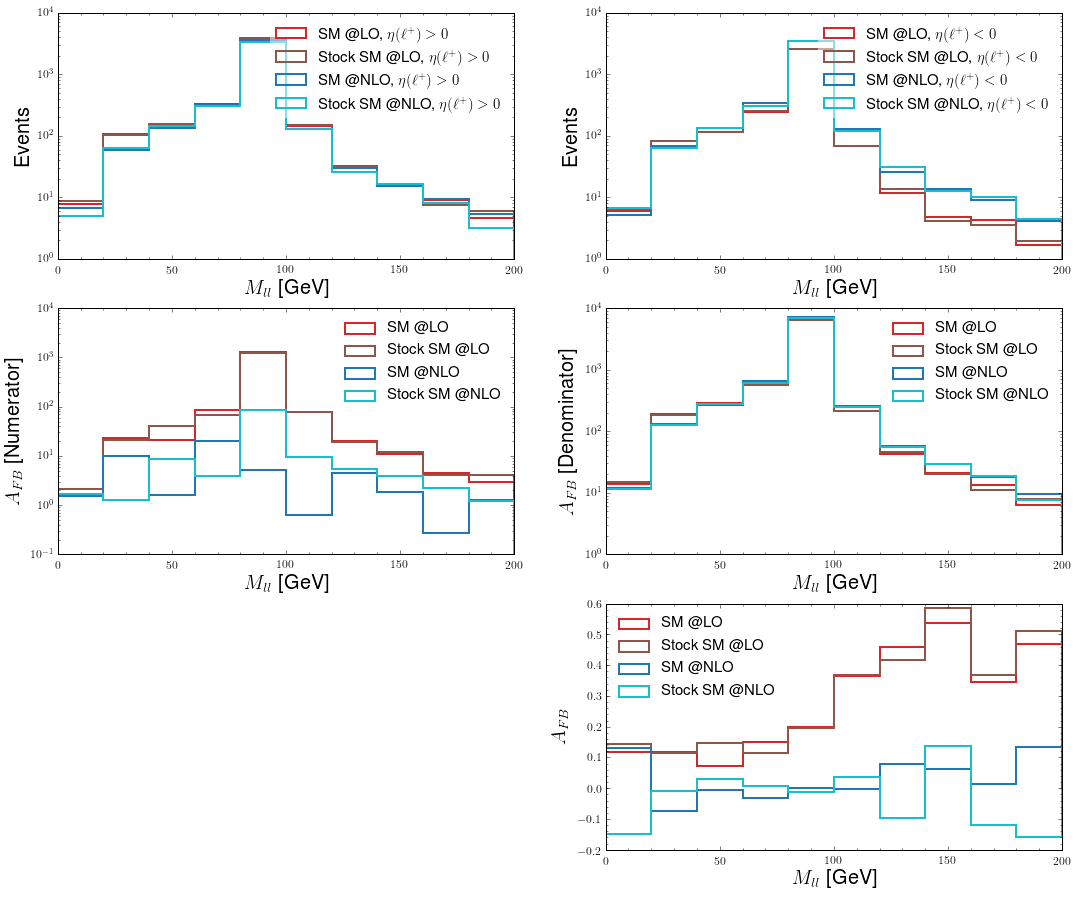

In [17]:
fig = plt.figure(1, figsize=(18, 15), facecolor='w', edgecolor='k')

bins = np.array(sm_histos[sm_histos.name=='AFB_pos_Rap_0'].binMin).tolist()+[max(sm_histos[sm_histos.name=='AFB_neg_Rap_0'].binMax)]

pos_eta = plt.hist(sm_histos[sm_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm_histos[sm_histos.name=='AFB_pos_Rap_0'].value,dtype=float)*sm.xsec/sm_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

StockSM_pos_eta = plt.hist(StockSM_histos[StockSM_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(StockSM_histos[StockSM_histos.name=='AFB_pos_Rap_0'].value,dtype=float)*StockSM.xsec/StockSM_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_pos_eta = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_0'].value,dtype=float)*SM_NLO.xsec/SM_NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

StockSM_NLO_pos_eta = plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(StockSM_NLO_histos[StockSM_NLO_histos.name=='AFB_pos_Rap_0'].value,dtype=float)*StockSM_NLO.xsec/StockSM_NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")



neg_eta = plt.hist(sm_histos[sm_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm_histos[sm_histos.name=='AFB_neg_Rap_0'].value,dtype=float)*sm.xsec/sm_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

StockSM_neg_eta = plt.hist(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_0'].value,dtype=float)*StockSM.xsec/StockSM_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_neg_eta = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_0'].value,dtype=float)*SM_NLO.xsec/SM_NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

StockSM_NLO_neg_eta = plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(StockSM_NLO_histos[StockSM_NLO_histos.name=='AFB_neg_Rap_0'].value,dtype=float)*StockSM_NLO.xsec/StockSM_NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")


AFBm = pos_eta[0] - neg_eta[0]
AFBp = pos_eta[0] + neg_eta[0]

StockSM_AFBm = StockSM_pos_eta[0] - StockSM_neg_eta[0]
StockSM_AFBp = StockSM_pos_eta[0] + StockSM_neg_eta[0]

SM_NLO_AFBm = SM_NLO_pos_eta[0] - SM_NLO_neg_eta[0]
SM_NLO_AFBp = SM_NLO_pos_eta[0] + SM_NLO_neg_eta[0]

StockSM_NLO_AFBm = StockSM_NLO_pos_eta[0] - StockSM_NLO_neg_eta[0]
StockSM_NLO_AFBp = StockSM_NLO_pos_eta[0] + StockSM_NLO_neg_eta[0]


ax1 = plt.subplot(3, 2, 1)
plt.hist(sm_histos[sm_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
             label=r'SM @LO, $\eta(\ell^+)>0$', histtype="step", rwidth=1.0,
             weights=pos_eta[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @LO, $\eta(\ell^+)>0$', histtype="step", rwidth=1.0,
             weights=StockSM_pos_eta[0],
             color=None, edgecolor='tab:brown', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
             label=r'SM @NLO, $\eta(\ell^+)>0$', histtype="step", rwidth=1.0,
             weights=SM_NLO_pos_eta[0],
             color=None, edgecolor='tab:blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @NLO, $\eta(\ell^+)>0$', histtype="step", rwidth=1.0,
             weights=StockSM_NLO_pos_eta[0],
             color=None, edgecolor='tab:cyan', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')

ax2 = plt.subplot(3, 2, 2)
plt.hist(sm_histos[sm_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'SM @LO, $\eta(\ell^+)<0$', histtype="step", rwidth=1.0,
             weights=neg_eta[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @LO, $\eta(\ell^+)<0$', histtype="step", rwidth=1.0,
             weights=StockSM_neg_eta[0],
             color=None, edgecolor='tab:brown', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'SM @NLO, $\eta(\ell^+)<0$', histtype="step", rwidth=1.0,
             weights=SM_NLO_neg_eta[0],
             color=None, edgecolor='tab:blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @NLO, $\eta(\ell^+)<0$', histtype="step", rwidth=1.0,
             weights=StockSM_NLO_neg_eta[0],
             color=None, edgecolor='tab:cyan', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')


ax3 = plt.subplot(3, 2, 3)
plt.hist(sm_histos[sm_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=abs(AFBm),
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @LO', histtype="step", rwidth=1.0,
             weights=abs(StockSM_AFBm),
             color=None, edgecolor='tab:brown', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=abs(SM_NLO_AFBm),
             color=None, edgecolor='tab:blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @NLO', histtype="step", rwidth=1.0,
             weights=abs(StockSM_NLO_AFBm),
             color=None, edgecolor='tab:cyan', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$ [Numerator]' , fontsize=20)

ax4 = plt.subplot(3, 2, 4)
plt.hist(sm_histos[sm_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
             label='SM @LO', histtype="step", rwidth=1.0,
             weights=AFBp,
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @LO', histtype="step", rwidth=1.0,
             weights=StockSM_AFBp,
             color=None, edgecolor='tab:brown', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=SM_NLO_AFBp,
             color=None, edgecolor='tab:blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @NLO', histtype="step", rwidth=1.0,
             weights=StockSM_NLO_AFBp,
             color=None, edgecolor='tab:cyan', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$ [Denominator]' , fontsize=20)


ax6 = plt.subplot(3, 2, 6)
plt.hist(sm_histos[sm_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=AFBm/np.where(AFBp==0,1e-30,AFBp),
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @LO', histtype="step", rwidth=1.0,
             weights=StockSM_AFBm/np.where(StockSM_AFBp==0,1e-30,StockSM_AFBp),
             color=None, edgecolor='tab:brown', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=SM_NLO_AFBm/np.where(SM_NLO_AFBp==0,1e-30,SM_NLO_AFBp),
             color=None, edgecolor='tab:blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @NLO', histtype="step", rwidth=1.0,
             weights=StockSM_NLO_AFBm/np.where(StockSM_NLO_AFBp==0,1e-30,StockSM_NLO_AFBp),
             color=None, edgecolor='tab:cyan', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$' , fontsize=20)


leg = ax1.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax1.set_xlim([min(bins),max(bins)])

leg = ax2.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax2.set_xlim([min(bins),max(bins)])

leg = ax3.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax3.set_xlim([min(bins),max(bins)])

leg = ax4.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax4.set_xlim([min(bins),max(bins)])

leg = ax6.legend(loc='upper left',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax6.set_xlim([min(bins),max(bins)])

plt.show()

# Absolute rapidity |y| > 0.8

In [153]:
ma5 = '/home/phylab/hepwork/madanalysis5'

sm  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMll_SameSeed/MadAnalysis5job_0/Cutflows',
                    saf_file       = '/home/phylab/hepwork/3.0.3-neworders/HEPTools/madanalysis5/madanalysis5/Benj_SM_leplep_SameSeed/Output/SAF/_defaultset/_defaultset.saf',
                    lumi           = 35.9)
sm_sumw   = sm['Rap_08'][0].sumw
sm_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMll_SameSeed/MadAnalysis5job_0/Histograms/histos.saf')


StockSM = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/StockSMll_SameSeed/MadAnalysis5job_0/Cutflows',
                    saf_file       = '/home/phylab/hepwork/3.0.3-neworders/HEPTools/madanalysis5/madanalysis5/StockSM_leplep_SameSeed/Output/SAF/_defaultset/_defaultset.saf',
                    lumi           = 35.9)
StockSM_sumw   = StockSM['Rap_08'][0].sumw
StockSM_histos = df(ma5+'/SSM_Zptoll/Output/SAF/StockSMll_SameSeed/MadAnalysis5job_0/Histograms/histos.saf')

In [ ]:
#from CutFlowTable import CutFlowTable
#out=open('comparison_y08.tex','w')
#CutFlowTable(sm,StockSM, sample_names=['SM @LO','Stock SM @LO']).write_comparison_table(out, mcunc=False)
#!make > mk.log && rm Makefile

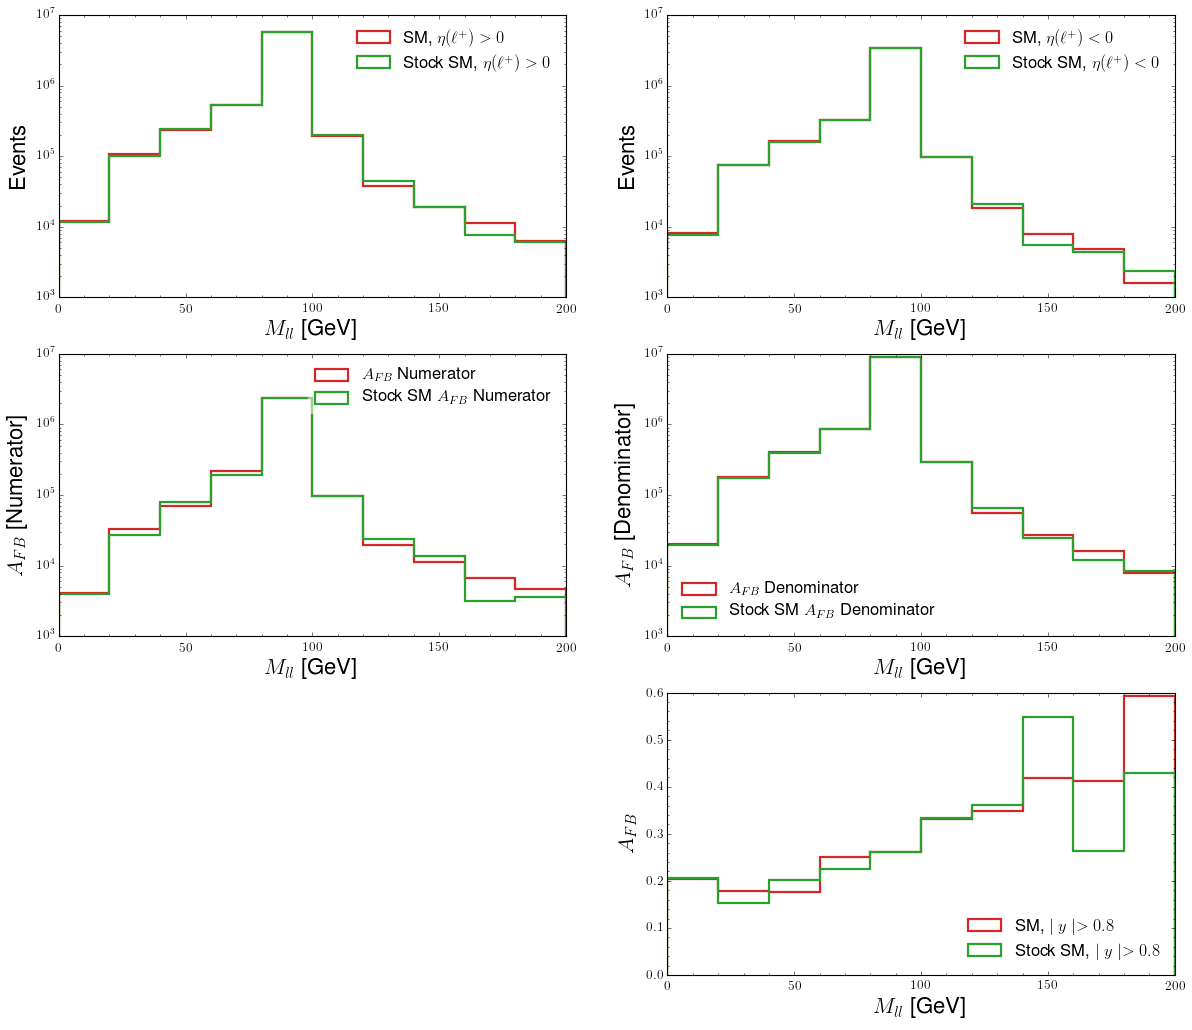

In [160]:
fig = plt.figure(1, figsize=(18, 15), facecolor='w', edgecolor='k')

bins = np.array(sm_histos[sm_histos.name=='AFB_pos_Rap_08'].binMin).tolist()+[max(sm_histos[sm_histos.name=='AFB_neg_Rap_08'].binMax)]

pos_eta = plt.hist(sm_histos[sm_histos.name=='AFB_pos_Rap_08'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm_histos[sm_histos.name=='AFB_pos_Rap_08'].value,dtype=float)*sm.xsec/sm_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

StockSM_pos_eta = plt.hist(StockSM_histos[StockSM_histos.name=='AFB_pos_Rap_08'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(StockSM_histos[StockSM_histos.name=='AFB_pos_Rap_08'].value,dtype=float)*StockSM.xsec/StockSM_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

neg_eta = plt.hist(sm_histos[sm_histos.name=='AFB_neg_Rap_08'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm_histos[sm_histos.name=='AFB_neg_Rap_08'].value,dtype=float)*sm.xsec/sm_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

StockSM_neg_eta = plt.hist(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_08'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_08'].value,dtype=float)*StockSM.xsec/StockSM_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")


AFBm = pos_eta[0] - neg_eta[0]
AFBp = pos_eta[0] + neg_eta[0]

StockSM_AFBm = StockSM_pos_eta[0] - StockSM_neg_eta[0]
StockSM_AFBp = StockSM_pos_eta[0] + StockSM_neg_eta[0]


ax1 = plt.subplot(3, 2, 1)
plt.hist(sm_histos[sm_histos.name=='AFB_pos_Rap_08'].binlabel,bins=bins,
             label=r'SM, $\eta(\ell^+)>0$', histtype="step", rwidth=1.0,
             weights=pos_eta[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_pos_Rap_08'].binlabel,bins=bins,
             label=r'Stock SM, $\eta(\ell^+)>0$', histtype="step", rwidth=1.0,
             weights=StockSM_pos_eta[0],
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')

ax2 = plt.subplot(3, 2, 2)
plt.hist(sm_histos[sm_histos.name=='AFB_neg_Rap_08'].binlabel,bins=bins,
             label=r'SM, $\eta(\ell^+)<0$', histtype="step", rwidth=1.0,
             weights=neg_eta[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_08'].binlabel,bins=bins,
             label=r'Stock SM, $\eta(\ell^+)<0$', histtype="step", rwidth=1.0,
             weights=StockSM_neg_eta[0],
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')


ax3 = plt.subplot(3, 2, 3)
plt.hist(sm_histos[sm_histos.name=='AFB_neg_Rap_08'].binlabel,bins=bins,
             label=r'$A_{FB}$ Numerator', histtype="step", rwidth=1.0,
             weights=AFBm,
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_08'].binlabel,bins=bins,
             label=r'Stock SM $A_{FB}$ Numerator', histtype="step", rwidth=1.0,
             weights=StockSM_AFBm,
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$ [Numerator]' , fontsize=20)
plt.yscale('log')


ax4 = plt.subplot(3, 2, 4)
plt.hist(sm_histos[sm_histos.name=='AFB_neg_Rap_08'].binlabel,bins=bins,
             label='$A_{FB}$ Denominator', histtype="step", rwidth=1.0,
             weights=AFBp,
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_pos_Rap_08'].binlabel,bins=bins,
             label=r'Stock SM $A_{FB}$ Denominator', histtype="step", rwidth=1.0,
             weights=StockSM_AFBp,
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$ [Denominator]' , fontsize=20)


ax6 = plt.subplot(3, 2, 6)
plt.hist(sm_histos[sm_histos.name=='AFB_neg_Rap_08'].binlabel,bins=bins,
             label=r'SM, $\mid y \mid > 0.8$', histtype="step", rwidth=1.0,
             weights=AFBm/np.where(AFBp==0,1e-30,AFBp),
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_08'].binlabel,bins=bins,
             label=r'Stock SM, $\mid y \mid > 0.8$', histtype="step", rwidth=1.0,
             weights=StockSM_AFBm/np.where(StockSM_AFBp==0,1e-30,StockSM_AFBp),
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$' , fontsize=20)


leg = ax1.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax1.set_xlim([min(bins),max(bins)])

leg = ax2.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax2.set_xlim([min(bins),max(bins)])

leg = ax3.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax3.set_xlim([min(bins),max(bins)])

leg = ax4.legend(loc='lower left',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax4.set_xlim([min(bins),max(bins)])

leg = ax5.legend(loc='lower left',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax5.set_xlim([min(bins),max(bins)])

leg = ax6.legend(loc='lower right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax6.set_xlim([min(bins),max(bins)])

plt.show()

# Absolute rapidity |y| > 1.5

In [155]:
ma5 = '/home/phylab/hepwork/madanalysis5'

sm  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMll_SameSeed/MadAnalysis5job_0/Cutflows',
                    saf_file       = '/home/phylab/hepwork/3.0.3-neworders/HEPTools/madanalysis5/madanalysis5/Benj_SM_leplep_SameSeed/Output/SAF/_defaultset/_defaultset.saf',
                    lumi           = 35.9)
sm_sumw   = sm['Rap_15'][0].sumw
sm_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMll_SameSeed/MadAnalysis5job_0/Histograms/histos.saf')


StockSM = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/StockSMll_SameSeed/MadAnalysis5job_0/Cutflows',
                    saf_file       = '/home/phylab/hepwork/3.0.3-neworders/HEPTools/madanalysis5/madanalysis5/StockSM_leplep_SameSeed/Output/SAF/_defaultset/_defaultset.saf',
                    lumi           = 35.9)
StockSM_sumw   = StockSM['Rap_15'][0].sumw
StockSM_histos = df(ma5+'/SSM_Zptoll/Output/SAF/StockSMll_SameSeed/MadAnalysis5job_0/Histograms/histos.saf')

In [ ]:
#from CutFlowTable import CutFlowTable
#out=open('comparison_y15.tex','w')
#CutFlowTable(sm,StockSM, sample_names=['SM @LO','Stock SM @LO']).write_comparison_table(out, mcunc=False)
#!make > mk.log && rm Makefile

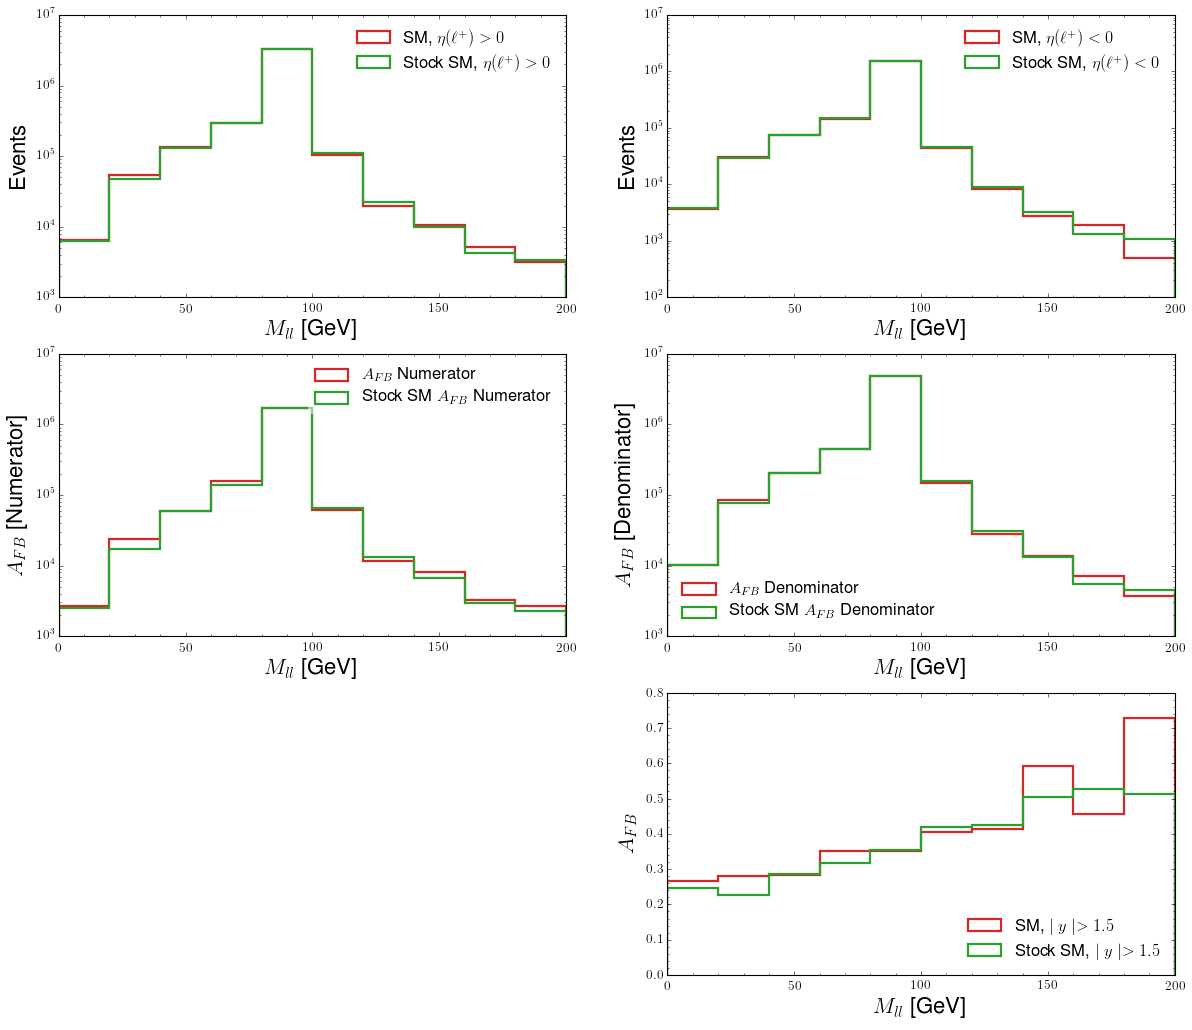

In [161]:
fig = plt.figure(1, figsize=(18, 15), facecolor='w', edgecolor='k')

bins = np.array(sm_histos[sm_histos.name=='AFB_pos_Rap_15'].binMin).tolist()+[max(sm_histos[sm_histos.name=='AFB_neg_Rap_15'].binMax)]

pos_eta = plt.hist(sm_histos[sm_histos.name=='AFB_pos_Rap_15'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm_histos[sm_histos.name=='AFB_pos_Rap_15'].value,dtype=float)*sm.xsec/sm_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

StockSM_pos_eta = plt.hist(StockSM_histos[StockSM_histos.name=='AFB_pos_Rap_15'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(StockSM_histos[StockSM_histos.name=='AFB_pos_Rap_15'].value,dtype=float)*StockSM.xsec/StockSM_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

neg_eta = plt.hist(sm_histos[sm_histos.name=='AFB_neg_Rap_15'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm_histos[sm_histos.name=='AFB_neg_Rap_15'].value,dtype=float)*sm.xsec/sm_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

StockSM_neg_eta = plt.hist(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_15'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_15'].value,dtype=float)*StockSM.xsec/StockSM_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")


AFBm = pos_eta[0] - neg_eta[0]
AFBp = pos_eta[0] + neg_eta[0]

StockSM_AFBm = StockSM_pos_eta[0] - StockSM_neg_eta[0]
StockSM_AFBp = StockSM_pos_eta[0] + StockSM_neg_eta[0]


ax1 = plt.subplot(3, 2, 1)
plt.hist(sm_histos[sm_histos.name=='AFB_pos_Rap_15'].binlabel,bins=bins,
             label=r'SM, $\eta(\ell^+)>0$', histtype="step", rwidth=1.0,
             weights=pos_eta[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_pos_Rap_15'].binlabel,bins=bins,
             label=r'Stock SM, $\eta(\ell^+)>0$', histtype="step", rwidth=1.0,
             weights=StockSM_pos_eta[0],
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')

ax2 = plt.subplot(3, 2, 2)
plt.hist(sm_histos[sm_histos.name=='AFB_neg_Rap_15'].binlabel,bins=bins,
             label=r'SM, $\eta(\ell^+)<0$', histtype="step", rwidth=1.0,
             weights=neg_eta[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_15'].binlabel,bins=bins,
             label=r'Stock SM, $\eta(\ell^+)<0$', histtype="step", rwidth=1.0,
             weights=StockSM_neg_eta[0],
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')


ax3 = plt.subplot(3, 2, 3)
plt.hist(sm_histos[sm_histos.name=='AFB_neg_Rap_15'].binlabel,bins=bins,
             label=r'$A_{FB}$ Numerator', histtype="step", rwidth=1.0,
             weights=AFBm,
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_15'].binlabel,bins=bins,
             label=r'Stock SM $A_{FB}$ Numerator', histtype="step", rwidth=1.0,
             weights=StockSM_AFBm,
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$ [Numerator]' , fontsize=20)
plt.yscale('log')


ax4 = plt.subplot(3, 2, 4)
plt.hist(sm_histos[sm_histos.name=='AFB_neg_Rap_15'].binlabel,bins=bins,
             label='$A_{FB}$ Denominator', histtype="step", rwidth=1.0,
             weights=AFBp,
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_pos_Rap_15'].binlabel,bins=bins,
             label=r'Stock SM $A_{FB}$ Denominator', histtype="step", rwidth=1.0,
             weights=StockSM_AFBp,
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$ [Denominator]' , fontsize=20)


ax6 = plt.subplot(3, 2, 6)
plt.hist(sm_histos[sm_histos.name=='AFB_neg_Rap_15'].binlabel,bins=bins,
             label=r'SM, $\mid y \mid > 1.5$', histtype="step", rwidth=1.0,
             weights=AFBm/np.where(AFBp==0,1e-30,AFBp),
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_15'].binlabel,bins=bins,
             label=r'Stock SM, $\mid y \mid > 1.5$', histtype="step", rwidth=1.0,
             weights=StockSM_AFBm/np.where(StockSM_AFBp==0,1e-30,StockSM_AFBp),
             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$' , fontsize=20)


leg = ax1.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax1.set_xlim([min(bins),max(bins)])

leg = ax2.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax2.set_xlim([min(bins),max(bins)])

leg = ax3.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax3.set_xlim([min(bins),max(bins)])

leg = ax4.legend(loc='lower left',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax4.set_xlim([min(bins),max(bins)])

leg = ax5.legend(loc='lower left',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax5.set_xlim([min(bins),max(bins)])

leg = ax6.legend(loc='lower right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax6.set_xlim([min(bins),max(bins)])

plt.show()

In [131]:
StockSM.xsec

663.6815

In [132]:
sm.xsec

663.43

In [133]:
StockSM_sumw

1041.86

In [134]:
sm_sumw

1041.565